## Twitter Sentiment Analysis - Hypothesis Testing

In [2]:
moab = read.csv("C:/Users/Ravi/Documents/Ravi/DS710/ds710spring2017_FinalProject/sentiment_data.csv")
attach(moab)

### Hypothesis test for all tweets.

H0: Mean of sentiment score <= 0
Ha: Mean of sentiment score > 0

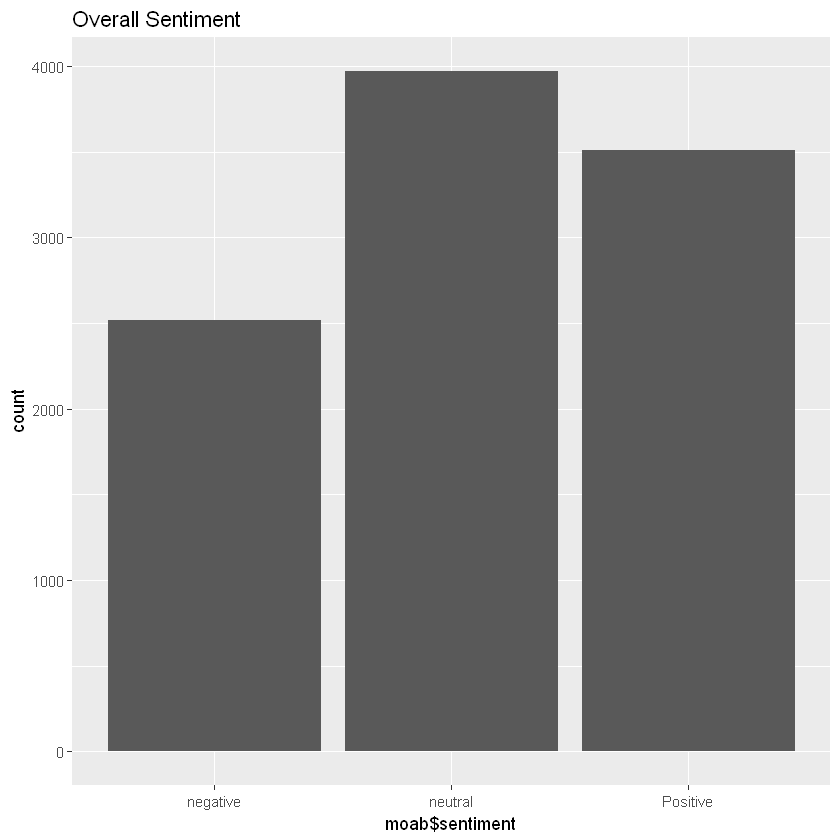

In [105]:
library(ggplot2)
ggplot(data.frame(moab$sentiment), aes(x=moab$sentiment)) + geom_bar() + ggtitle("Overall Sentiment")

In [66]:
t.test(sentiment_polarity, mu = 0 , alternative = "greater")


	One Sample t-test

data:  sentiment_polarity
t = 16.675, df = 9990, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.04123996        Inf
sample estimates:
 mean of x 
0.04575365 


At 0.01 significance interval we have enough evidence to reject null hypothesis, In other words we have enough eveidence to say that overall tweet sentiment is not negative.

## Group sentment polarity by tweets orginated in USA and tweets orginated from rest of the world

In [100]:
# filter out tweets which orginated in USA and tweets orginated outside usa
usa = which(moab$region == "USA")
row = which(moab$region != "" & moab$region != "USA")
usa_sentiment = moab$sentiment[usa]
row_sentiment = moab$sentiment[row]
usa_polarity = moab$sentiment_polarity[usa]
row_polarity = moab$sentiment_polarity[row]

### Hypothesis test for tweets orginated in USA (note: not all tweets have locations, analysis done on tweets with locations)

H0: Mean of sentiment score orginated in usa <= 0
Ha: Mean of sentiment score orginated in usa > 0

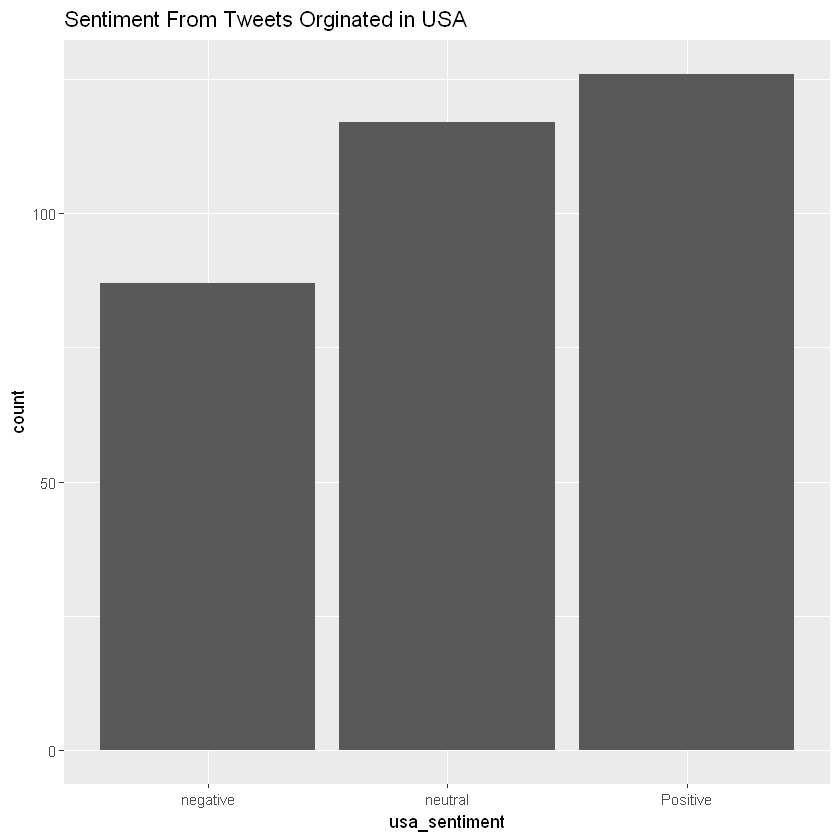

In [98]:
ggplot(data.frame(usa_sentiment), aes(x=usa_sentiment)) + geom_bar()+ggtitle("Sentiment From Tweets Orginated in USA")

In [93]:
t.test(usa_polarity, mu = 0 , alternative = "greater")


	One Sample t-test

data:  usa_polarity
t = 3.2983, df = 329, p-value = 0.0005396
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.02356712        Inf
sample estimates:
 mean of x 
0.04714413 


At 0.01 significance interval we have enough evidence to reject null hypothesis, In other words we have enough eveidence to say that tweets orginated from USA has positve sentiment.

### Hypothesis test for tweets which orginated outside USA. (note: not all tweets have locations, analysis done on tweets with locations)

H0: Mean of sentiment score orginated outside usa <= 0
Ha: Mean of sentiment score orginated outside usa > 0

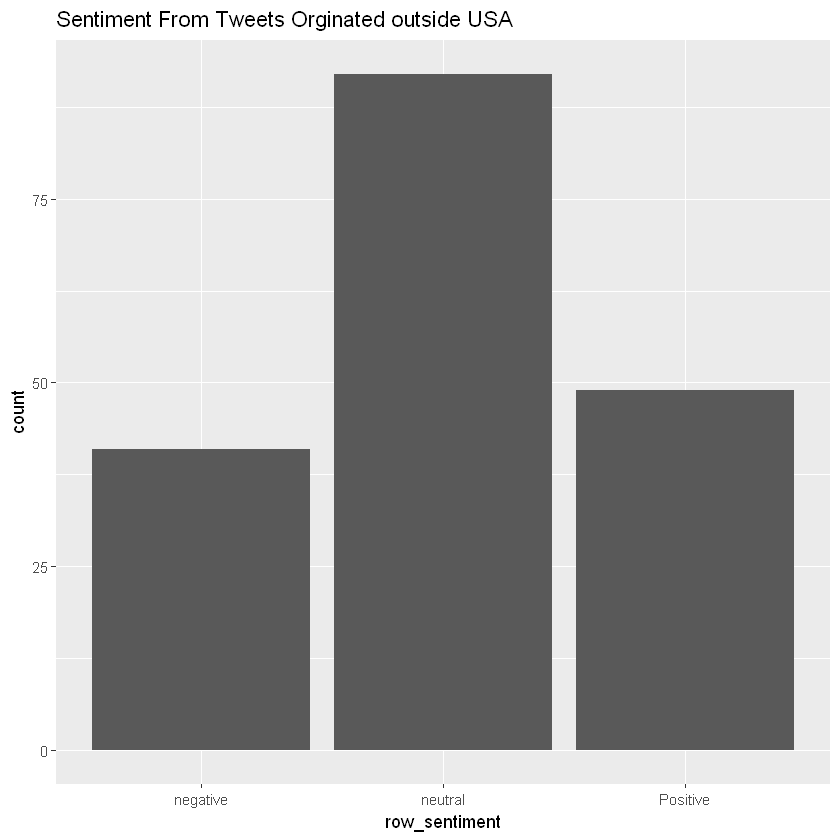

In [99]:
ggplot(data.frame(row_sentiment), aes(x=row_sentiment)) + geom_bar()+ggtitle("Sentiment From Tweets Orginated outside USA")

In [94]:
t.test(row_polarity, mu = 0 , alternative = "greater")


	One Sample t-test

data:  row_polarity
t = 0.92094, df = 181, p-value = 0.1792
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -0.01479189         Inf
sample estimates:
 mean of x 
0.01860035 


At 0.05 significance interval we do not have enough evidence to reject null hypothesis. In other words we do not have enough evidence to say that tweets orginated outside usa have postive sentiment.

### In general people who retweet a certain tweet tend to agree with the view of the tweet.  Calculate total number of tweet+retweets for respective sentiments to get total count of each sentiment.

In [107]:
positive = which(moab$sentiment == "Positive")
neutral = which(moab$sentiment == "neutral")
negative = which(moab$sentiment == "negative")
pos_count = length(positive)
neu_count = length(neutral)
neg_count = length(negative)

In [111]:
pos_retweet = moab$retweet_count[positive]
neu_retweet = moab$retweet_count[neutral]
neg_retweet = moab$retweet_count[negative]
pos_retweet_count = sum(pos_retweet)
neu_retweet_count = sum(neu_retweet)
neg_retweet_count = sum(neg_retweet)


In [113]:
pos_total = pos_count+pos_retweet_count
neu_total = neu_count+neu_retweet_count
neg_total = neg_count+neg_retweet_count

In [115]:
tweet_sentiment = c("Positive_Tweet", "Neutral_Tweet", "Negative_Tweet")
tweet_count = c(pos_total, neu_total, neg_total)
total_tweet = data.frame(tweet_sentiment, tweet_count)
total_tweet

tweet_sentiment,tweet_count
Positive_Tweet,13626
Neutral_Tweet,14544
Negative_Tweet,10345


Based on tweet count and retweet count overall user sentiment leans more towards positive sentiment.

## Check if there is a relationship between user follower count and retweet count. Does users who are popular (high follower count) get the highest number of retweets

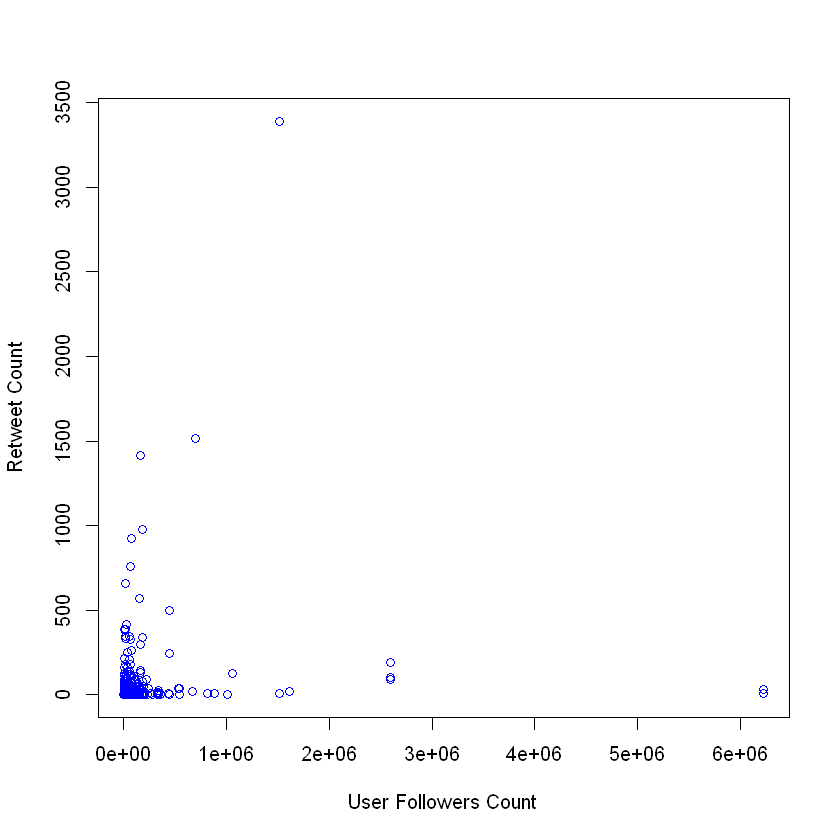

In [143]:
plot(moab$retweet_count ~ moab$user_followers_count, xlab = "User Followers Count", ylab = "Retweet Count", col = "blue")

Based on the chart above the data is right skewed and we do not see any relationship, apply log transforamtion on both  x and y. Also there are lot of users with zero retweets, need to remove these since we cannot apply log transformation on zero count which would give a infinity value.

## filter out tweets with 0 retweets and apply log transformation

In [151]:
count_nonzero = which(moab$retweet_count != 0)
retweet_count_nonzero = moab$retweet_count[count_nonzero]
users_retweet_nonzero = moab$user_followers_count[count_nonzero]

In [163]:
log_retweetcount = log(retweet_count_nonzero)
log_userfollowers = log(users_retweet_nonzero)

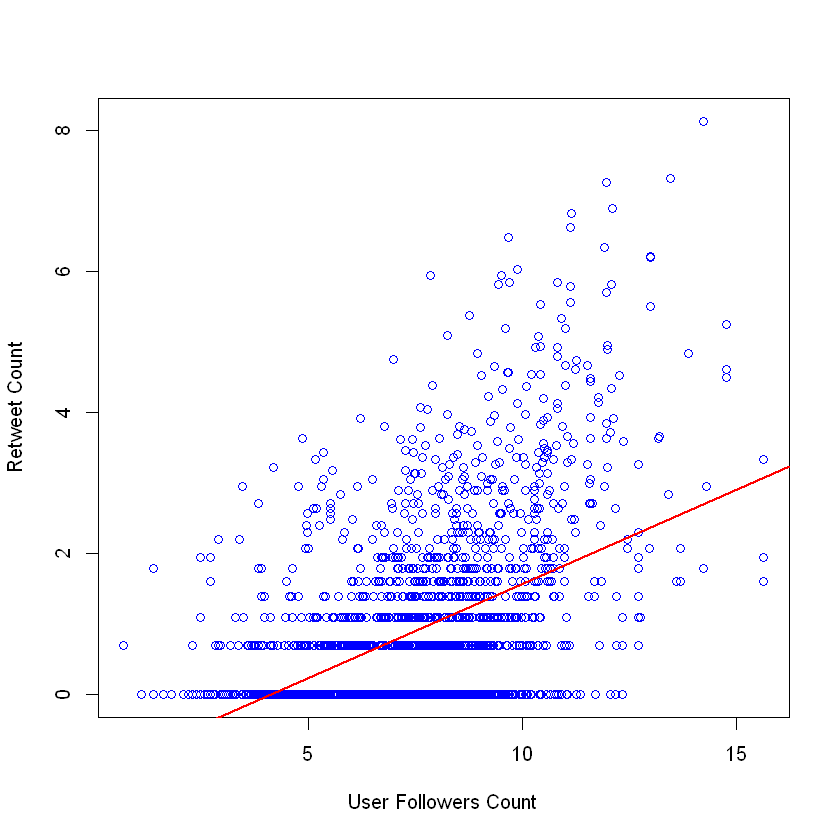

In [182]:
plot(log_retweetcount ~ log_userfollowers, xlab = "User Followers Count", ylab = "Retweet Count", col = "blue")
abline(lm(log_retweetcount~log_userfollowers), col="red", lwd=2)

After log transformation there is some evidence that there is a liner relationship between follower count and retweet count, but not a strong linearity.

## Check if retweet count increases based on sentiment score. If the the most positive or the most negative tweets get more retweets

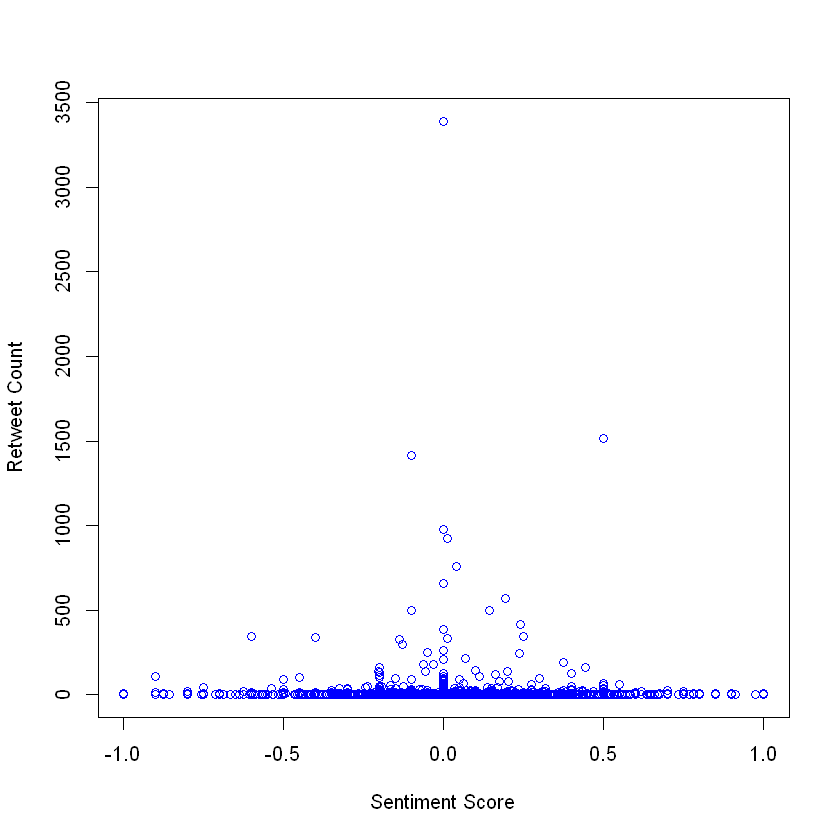

In [144]:
plot(moab$retweet_count ~ moab$sentiment_polarity, , xlab = "Sentiment Score", ylab = "Retweet Count", col = "blue")

Based on the garph above there is no relationship between sentiment score and retweet count. Apply log transformation on y axis to check if that gives us a better view. Use tweets where retweet >0.

In [180]:
sentiment_nonzero_retweets  = moab$sentiment_polarity[count_nonzero]

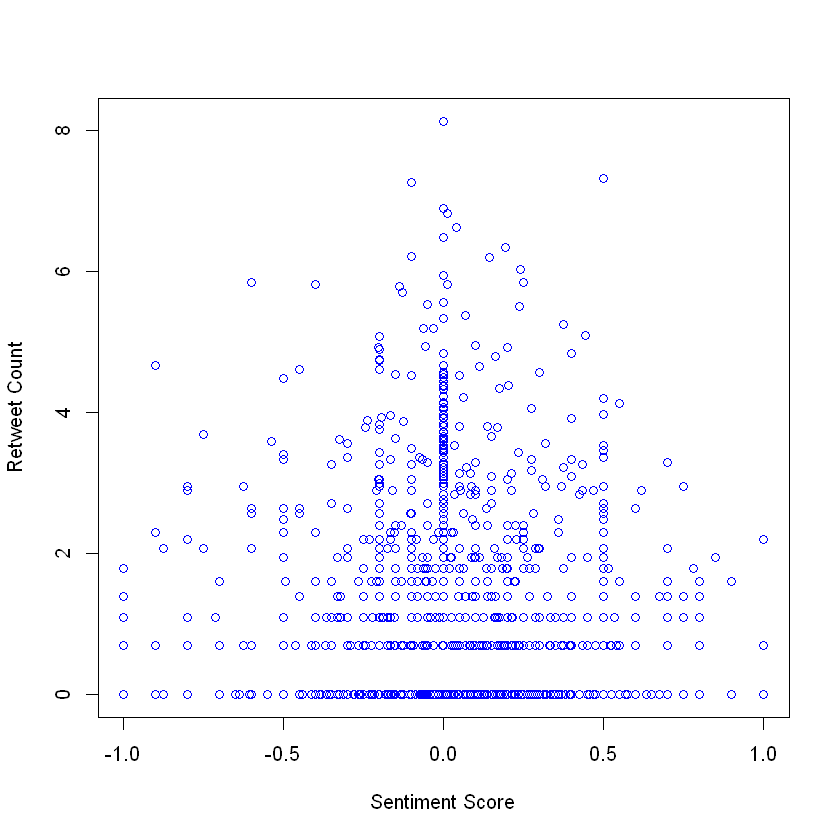

In [183]:
plot(log_retweetcount ~ sentiment_nonzero_retweets, xlab = "Sentiment Score", ylab = "Retweet Count", col = "blue")

This confirms that there is no linear relationship between sentiment score and retweet count. Based on the chart above we see that tweets with neutral sentiment or close to neutral sentiment get the most retweets. So neither tweets with high negative sentiment nor tweets with high positive sentiment get the most retweets.